In [1]:
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Object Detection

- Image classification vs Object detection vs Image Segmentation
<br>
- How does object detection work?
  - Input image --> Trained object detection model --> Label, Confidence, Bounding boxes for each object.
<br>
- SSD-MobileNet V3 Pretrained Model (Single-Shot Detection + MobileNet)
  - Download weights and hyperparam config files of the pretrained model from the OpenCV GitHub Tensorflow Object Detection API: https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API
  - Download the class label file of the COCO dataset (80 categories): https://github.com/pjreddie/darknet/blob/master/data/coco.names
<br>
- Advantages: fast, no GPU required for deep learning.
- Disadvantages: fair accuracy, adhere to certain object categories.
<br>
- Image used: https://unsplash.com/photos/tokYjYqaPB0
<br>
- Video used:https://www.youtube.com/watch?v=0lYxVnbcOkY

# Load Pretrained Model

In [2]:
# extract zipped file

!tar -xvzf .\ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz -C .\

x ssd_mobilenet_v3_large_coco_2020_01_14/pipeline.config
x ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.index
x ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.data-00000-of-00001
x ssd_mobilenet_v3_large_coco_2020_01_14/model.tflite
x ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb
x ssd_mobilenet_v3_large_coco_2020_01_14/checkpoint
x ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.meta
x ssd_mobilenet_v3_large_coco_2020_01_14/


In [3]:
# paths

model_config = './ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt.txt'
model_weights = './ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb'
label_names = './coco.names.txt'

In [4]:
# load labels

ls_label_names = []
with open(label_names, 'r') as txt_file:
    ls_label_names = txt_file.read().rstrip('\n').split('\n')

In [5]:
len(ls_label_names)

80

In [6]:
ls_label_names

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
# load pretrained model

model = cv2.dnn.readNetFromTensorflow(model_weights, model_config)

# Detect Objects in an Image

In [8]:
# load image

img = cv2.imread('./bicycle.jpg')

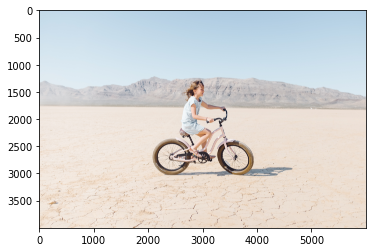

In [9]:
# convert to RGB 

img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)

Photo by NeONBRAND on Unsplash: https://unsplash.com/photos/tokYjYqaPB0

In [10]:
# set input config for the model

input_preprocessed = cv2.dnn.blobFromImage(image=img, 
                                          scalefactor=1.0 / 127.5, 
                                          size=(320, 320), 
                                          mean=(127.5, 127.5, 127.5), 
                                          swapRB=True,
                                          crop=False)
model.setInput(input_preprocessed)

In [11]:
# test model

model_preds = model.forward()

In [12]:
model_preds.shape

(1, 1, 100, 7)

In [13]:
for detection in model_preds[0, 0, :, :]:
    print(detection[0])  # always 0.0
    print(detection[1])  # class label index
    print(detection[2])  # confidence
    print(detection[3])  # Bbox position top left x
    print(detection[4])  # Bbox position top left y
    print(detection[5])  # Bbox position bottom right x
    print(detection[6])  # Bbox position bottom right y
    print('next')

0.0
1.0
0.7016602
0.42410612
0.30973175
0.5702944
0.6775801
next
0.0
2.0
0.66872615
0.33937514
0.5043907
0.66185975
0.7720027
next
0.0
1.0
0.51902044
0.37253833
0.38579017
0.5944373
0.7381322
next
0.0
4.0
0.41558334
0.34235743
0.49120384
0.6561048
0.76281446
next
0.0
2.0
0.30931893
0.36565414
0.48259822
0.58783925
0.7388685
next
0.0
43.0
0.2854783
0.35911
0.5357896
0.6522112
0.7510047
next
0.0
2.0
0.27052537
0.3944791
0.35721505
0.5720358
0.70091033
next
0.0
77.0
0.26262257
0.4672202
0.36179003
0.48384333
0.38928613
next
0.0
62.0
0.22577848
0.3585017
0.5360719
0.6436603
0.7432345
next
0.0
2.0
0.21591139
0.45461696
0.4679191
0.6461298
0.7426814
next
0.0
1.0
0.213267
0.35070354
0.47680777
0.64851505
0.7582734
next
0.0
43.0
0.19517821
0.45461696
0.4679191
0.6461298
0.7426814
next
0.0
1.0
0.18201037
0.39601427
0.30873576
0.522821
0.6601566
next
0.0
31.0
0.17555213
0.50195646
0.47843617
0.5675651
0.55340534
next
0.0
1.0
0.15290032
0.4335624
0.3304866
0.62037814
0.7598285
next
0.0
31.0
0.151

In [14]:
# determine image shape for scale

img_h, img_w = img.shape[0], img.shape[1]

In [15]:
# draw bounding box and put text for every detected object

for detection in model_preds[0, 0, :, :]:
    
    # determine confidence score and ignore the ones with below chance-level confidence score
    score = float(detection[2])
    if score > 0.6:
        
        # compute label name, confidence and bounding box
        class_label = int(detection[1])
        label_name = ls_label_names[class_label-1]
        conf = detection[2]
        bbox_tl_x = int(detection[3] * img_w)  # scale them back to original size
        bbox_tl_y = int(detection[4] * img_h)
        bbox_br_x = int(detection[5] * img_w)
        bbox_br_y = int(detection[6] * img_h)
        
        # draw bounding box
        cv2.rectangle(img=img_RGB, pt1=(bbox_tl_x, bbox_tl_y), pt2=(bbox_br_x, bbox_br_y), 
                  color=(0, 0, 255), thickness=10)
        
        # display label name
        text = f"{label_name}: {conf * 100:.2f}%"
        cv2.putText(img=img_RGB, 
                    text=text, 
                    org=(bbox_tl_x, bbox_tl_y-50), 
                    fontFace= cv2.FONT_HERSHEY_SIMPLEX, 
                    fontScale = 5,
                    color=(0, 0, 255), thickness=10)

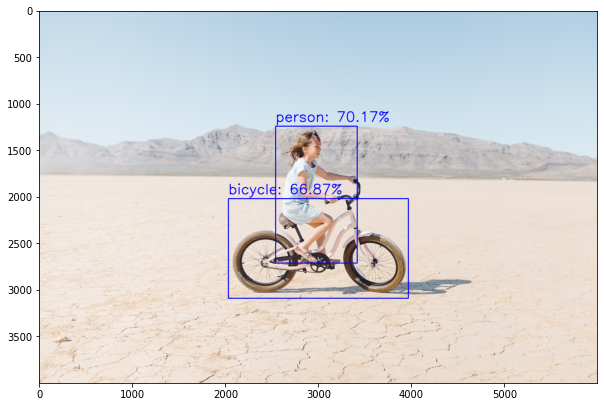

In [16]:
# display image

fig = plt.figure(figsize=(10, 8))  # size by inches
ax = fig.add_subplot(111)
ax.imshow(img_RGB)

# Detect Objects in a Video File

In [17]:
# capture video from default camera
video_frames = cv2.VideoCapture('./music-video.mp4')  # 0: default camera

# get frame size from camera
frame_width = int(video_frames.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_frames.get(cv2.CAP_PROP_FRAME_HEIGHT))

# initialize writer
# fourcc: video codec. DIVX for windows, XVID for linux and macOS
# fps: 30
writer = cv2.VideoWriter('./music-video-obj-detection.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 30, (frame_width, frame_height))   
 
# loop: grab frame and display image
while True:
    # read frames
    ret, frame = video_frames.read()
    
    # object detection
    # set input config for the model
    input_preprocessed = cv2.dnn.blobFromImage(image=frame, 
                                              scalefactor=1.0 / 127.5, 
                                              size=(320, 320), 
                                              mean=(127.5, 127.5, 127.5), 
                                              swapRB=True,
                                              crop=False)
    model.setInput(input_preprocessed)
    
    # test model
    model_preds = model.forward()
    
    # draw bounding box and put text for every detected object
    for detection in model_preds[0, 0, :, :]:
    
        # determine confidence score and ignore the ones with below chance-level confidence score
        score = float(detection[2])
        if score > 0.6:

            # compute label name, confidence and bounding box
            class_label = int(detection[1])
            label_name = ls_label_names[class_label-1]
            conf = detection[2]
            bbox_tl_x = int(detection[3] * frame_width)  # scale them back to original size
            bbox_tl_y = int(detection[4] * frame_height)
            bbox_br_x = int(detection[5] * frame_width)
            bbox_br_y = int(detection[6] * frame_height)

            # draw bounding box
            cv2.rectangle(img=frame, pt1=(bbox_tl_x, bbox_tl_y), pt2=(bbox_br_x, bbox_br_y), 
                      color=(0, 0, 255), thickness=5)

            # display label name
            text = f"{label_name}: {conf * 100:.2f}%"
            cv2.putText(img=frame, 
                        text=text, 
                        org=(bbox_tl_x, bbox_tl_y-50), 
                        fontFace= cv2.FONT_HERSHEY_SIMPLEX, 
                        fontScale = 2,
                        color=(0, 0, 255), thickness=10)
    
    # save video
    writer.write(frame)
    
    # show frame
    cv2.imshow('frame', frame)
    
    # if frame is display for more than 1 ms and ESC key is pressed, close display
    if cv2.waitKey(1) & 0xFF == 27:
        break

video_frames.release()
writer.release()
cv2.destroyAllWindows()

# Detect Objects on Live Camera

In [18]:
# capture video from default camera
video_frames = cv2.VideoCapture(0)  # 0: default camera

# get frame size from camera
frame_width = int(video_frames.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_frames.get(cv2.CAP_PROP_FRAME_HEIGHT))

# initialize writer
# fourcc: video codec. DIVX for windows, XVID for linux and macOS
# fps: 30
writer = cv2.VideoWriter('./live-obj-detection.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 30, (frame_width, frame_height))   
 
# loop: grab frame and display image
while True:
    # read frames
    ret, frame = video_frames.read()
    
    # object detection
    # set input config for the model
    input_preprocessed = cv2.dnn.blobFromImage(image=frame, 
                                              scalefactor=1.0 / 127.5, 
                                              size=(320, 320), 
                                              mean=(127.5, 127.5, 127.5), 
                                              swapRB=True,
                                              crop=False)
    model.setInput(input_preprocessed)
    
    # test model
    model_preds = model.forward()
    
    # draw bounding box and put text for every detected object
    for detection in model_preds[0, 0, :, :]:
    
        # determine confidence score and ignore the ones with below chance-level confidence score
        score = float(detection[2])
        if score > 0.6:

            # compute label name, confidence and bounding box
            class_label = int(detection[1])
            label_name = ls_label_names[class_label-1]
            conf = detection[2]
            bbox_tl_x = int(detection[3] * frame_width)  # scale them back to original size
            bbox_tl_y = int(detection[4] * frame_height)
            bbox_br_x = int(detection[5] * frame_width)
            bbox_br_y = int(detection[6] * frame_height)

            # draw bounding box
            cv2.rectangle(img=frame, pt1=(bbox_tl_x, bbox_tl_y), pt2=(bbox_br_x, bbox_br_y), 
                      color=(0, 0, 255), thickness=5)

            # display label name
            text = f"{label_name}: {conf * 100:.2f}%"
            cv2.putText(img=frame, 
                        text=text, 
                        org=(bbox_tl_x, bbox_tl_y-50), 
                        fontFace= cv2.FONT_HERSHEY_SIMPLEX, 
                        fontScale = 2,
                        color=(0, 0, 255), thickness=10)
    
    # save video
    writer.write(frame)
    
    # show frame
    cv2.imshow('frame', frame)
    
    # if frame is display for more than 1 ms and ESC key is pressed, close display
    if cv2.waitKey(1) & 0xFF == 27:
        break

video_frames.release()
writer.release()
cv2.destroyAllWindows()